In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
rso_data = pd.read_csv('C:\\Users\\scher\\school\\senior-thesis\\data\\rso_data.txt', index_col=0).drop(columns='Type')
rso_data['Standing'].unique()

array([ 23,  12,  10,   6,  29,  18,   1,  13,   3,  15,  16,   2,  17,
         8,   4,  11,   5,  27,  14,  35,   9,  26,  64,  38,   7,  20,
        21,  24,  34,  31,  22,  30, 111,  32,  28,  45,  41,  19,  63,
        36,  39,  25, 113,  33,  65,  46,  42,  37,  40, 114,  66,  47,
        43, 115,  67,  48,   0, 116,  49,  69,  85, 117,  70,  86, 118,
        50,  71,  87, 119,  51,  72,  88, 120,  52], dtype=int64)

In [3]:
rso_data[(rso_data['Standing'] > 50) & (rso_data['Year'] == 2019)]

Year                      Organization  \
3013  2019    Cal Hiking and Outdoor Society   
3088  2019             Friends of the Co-ops   
3265  2019                UC Rally Committee   
3383  2019  Queer Alliance & Resource Center   

                                    Designation  Standing  Allocation  
3013                           Recreational RSO        71      5000.0  
3088  Cultural & Identity/Cultural & Ethnic RSO        87     10000.0  
3265                                Service RSO       119     40000.0  
3383             Cultural & Identity/LGBTQ+ RSO        51     40000.0

# Group levels of `Standing`

In [4]:
rso_data.groupby('Year').size()

Year
2012    330
2013    395
2014    400
2015    424
2016    469
2017    454
2018    424
2019    526
2020    457
dtype: int64

In [5]:
rso_2019 = rso_data[rso_data['Year'] == 2019]

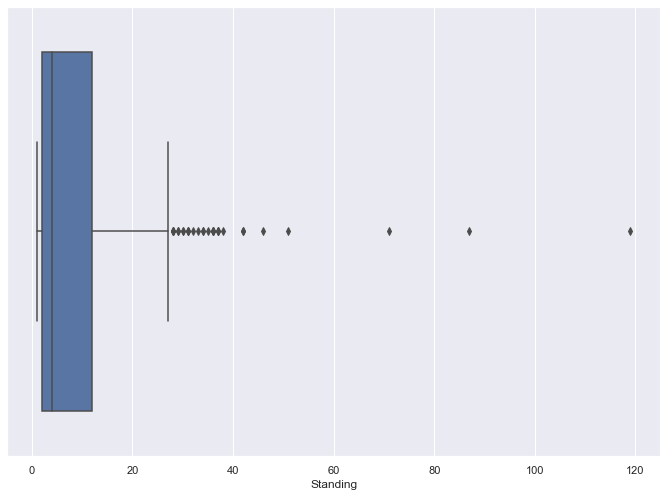

In [6]:
sns.boxplot(x='Standing', data=rso_2019)

In [27]:
np.percentile(rso_2019['Standing'], 80)

14.0

In [22]:
rso_data[rso_data['Standing']==0].head(50)

Year                                       Organization  \
1590  2016    American Indian Science and Engineering Society   
1591  2016  American Institute of Aeronautics and Astronau...   
1596  2016             Anthropology Undergraduate Association   
1613  2016                                Berkeley Consulting   
1614  2016                                Berkeley Consulting   
1615  2016                                    Berkeley Energy   
1617  2016                                Berkeley Innovation   
1618  2016                          Berkeley Investment Group   
1621  2016       Berkeley Undergraduate Sociology Association   
1624  2016                       Bioengineering Honor Society   
1625  2016                             Blockchain at Berkeley   
1626  2016  Black Engineering and Science Students Associa...   
1629  2016                    Brazilian Jiu-Jitsu at Berkeley   
1646  2016                       Canadian Student Association   
1649  2016                               CED Wellness Leaders   
1651  2016      Chi Epsilon - Civil Engineering Honor Society   
1658  2016                     College Ski and Snowboard Club   
1666  2016                            Coptic Club at Berkeley   
1670  2016                                  CREWs UC Berkeley   
1672  2016                                                Cru   
1673  2016                                       CS KickStart   
1674  2016                   Cultural Connections of Berkeley   
1677  2016                   Data Science Society at Berkeley   
1678  2016        Datong Society of China Studies at Berkeley   
1681  2016         Department of Integrative Biology Students   
1682  2016                                        DiversaTech   
1687  2016                Engineering Innovation & Consulting   
1690  2016                          Epic Movement at Berkeley   
1691  2016                      Escape the Lights Social Club   
1693  2016                 EU Student Ambassadors at Berkeley   
1696  2016                                            FEMTech   
1699  2016  Financial Literacy and Economic Justice Confer...   
1701  2016      Food, Equity, Entrepreneurship, & Development   
1703  2016               Freshman and Sophomore Business Club   
1706  2016               Global Business Brigades at Berkeley   
1709  2016                            Guitar Club at Berkeley   
1711  2016           Hellenic Student Association at Berkeley   
1717  2016                       Hyperloop Initiative Program   
1722  2016         International Students' Advisory Committee   
1726  2016                    Iota Sigma Pi, Hydrogen Chapter   
1732  2016                                 Jugger at Berkeley   
1736  2016                                Nazakat at Berkeley   
1741  2016                           Korean Performance Group   
1742  2016                                 Korean Tennis Club   
1744  2016  Korean-American Scientists and Engineers Assoc...   
1750  2016                 Undergraduate Legal Honors Society   
1752  2016                                Legends of Berkeley   
1761  2016                     Microbial Sciences Association   
1768  2016  National Student Speech Language Hearing Assoc...   
1769  2016                       Nepalese Student Association   

                                    Designation  Standing  Allocation  
1590  Cultural & Identity/Cultural & Ethnic RSO         0         0.0  
1591                           Departmental RSO         0         0.0  
1596                           Departmental RSO         0       200.0  
1613                           Professional RSO         0         0.0  
1614                           Professional RSO         0         0.0  
1615         Environmental & Sustainability RSO         0         0.0  
1617                                   Arts RSO         0         0.0  
1618                           Professional RSO         0         0.0  
1621                           Departmenta

In [28]:
rso_data[rso_data['Organization'].str.contains('Nazakat')]

Year         Organization          Designation  Standing  Allocation
1736  2016  Nazakat at Berkeley  Performing Arts RSO         0       500.0
2227  2017  Nazakat at Berkeley  Performing Arts RSO         1       400.0
2682  2018  Nazakat at Berkeley  Performing Arts RSO         2       400.0
3662  2020  Nazakat at Berkeley  Performing Arts RSO         1       400.0

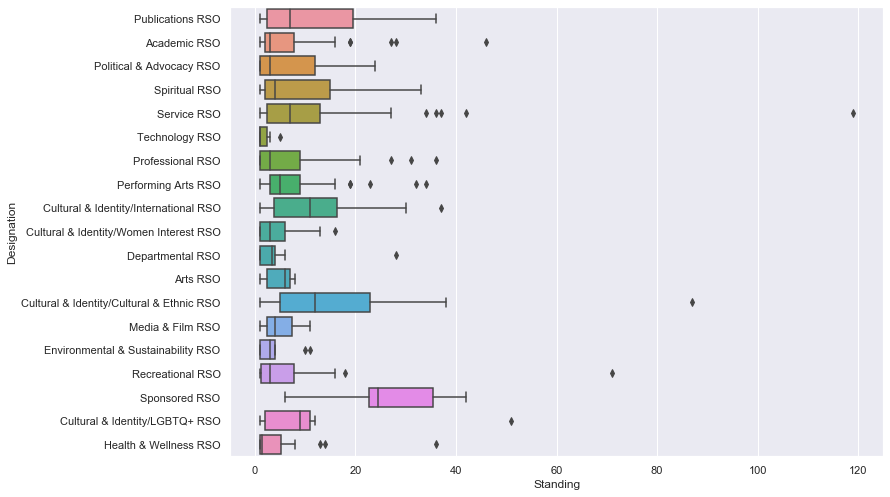

In [7]:
sns.boxplot(x='Standing', y='Designation', data=rso_2019)

# Normalization

In [4]:
norm_rso_data = rso_data.copy(deep=True)

## Normalizing values by year

In [5]:
def y_norm(data, row):
    year = row[['Year']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[data['Year'] == year]['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [6]:
norm_rso_data['norm_by_y'] = norm_rso_data.apply(lambda r: y_norm(rso_data, r), axis=1)
norm_rso_data

Year                                Organization            Designation  \
0     2012                            maganda magazine       Publications RSO   
1     2012                                     Threads       Publications RSO   
2     2012                          Alternative Breaks            Service RSO   
3     2012                               BARE Magazine       Publications RSO   
4     2012                     Berkeley Fiction Review       Publications RSO   
...    ...                                         ...                    ...   
3874  2020  Volunteer Health Interpreters Organization  Health & Wellness RSO   
3875  2020     Volunteer Income Tax Assistance Program            Service RSO   
3876  2020     Volunteers Around the World at Berkeley            Service RSO   
3877  2020                                 Wonderworks            Service RSO   
3878  2020                               You Mean More  Health & Wellness RSO   

      Standing  Allocation  norm_by_y  
0           23     1592.02  -0.008281  
1           12     1300.00  -0.070396  
2           10      891.07  -0.157379  
3            6     1250.00  -0.081032  
4           29     1036.99  -0.126341  
...        ...         ...        ...  
3874        15     4300.00   0.417203  
3875         8      480.00  -0.196592  
3876         7      250.00  -0.233549  
3877        10        0.00  -0.273719  
3878         9     1200.00  -0.080903  

[3879 rows x 6 columns]

## Normalizing values by year and designation

In [7]:
def yd_norm(data, row):
    year = row[['Year']].values[0]
    desig = row[['Designation']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[(data['Year'] == year) 
                             & (data['Designation'] == desig)]
                        ['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [8]:
norm_rso_data['norm_by_yd'] = norm_rso_data.apply(lambda r: yd_norm(rso_data, r), axis=1)
norm_rso_data

Year                                Organization            Designation  \
0     2012                            maganda magazine       Publications RSO   
1     2012                                     Threads       Publications RSO   
2     2012                          Alternative Breaks            Service RSO   
3     2012                               BARE Magazine       Publications RSO   
4     2012                     Berkeley Fiction Review       Publications RSO   
...    ...                                         ...                    ...   
3874  2020  Volunteer Health Interpreters Organization  Health & Wellness RSO   
3875  2020     Volunteer Income Tax Assistance Program            Service RSO   
3876  2020     Volunteers Around the World at Berkeley            Service RSO   
3877  2020                                 Wonderworks            Service RSO   
3878  2020                               You Mean More  Health & Wellness RSO   

      Standing  Allocation  norm_by_y  norm_by_yd  
0           23     1592.02  -0.008281    0.036367  
1           12     1300.00  -0.070396   -0.025748  
2           10      891.07  -0.157379   -0.181246  
3            6     1250.00  -0.081032   -0.036383  
4           29     1036.99  -0.126341   -0.081692  
...        ...         ...        ...         ...  
3874        15     4300.00   0.417203    0.413642  
3875         8      480.00  -0.196592   -0.293456  
3876         7      250.00  -0.233549   -0.330412  
3877        10        0.00  -0.273719   -0.370582  
3878         9     1200.00  -0.080903   -0.084464  

[3879 rows x 7 columns]

## Normalize values by year and standing

In [10]:
def ys_norm(data, row):
    year = row[['Year']].values[0]
    standing = row[['Standing']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[(data['Year'] == year) 
                             & (data['Standing'] == standing)]
                        ['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [11]:
norm_rso_data['norm_by_ys'] = norm_rso_data.apply(lambda r: ys_norm(rso_data, r), axis=1)
norm_rso_data

Year                                Organization            Designation  \
0     2012                            maganda magazine       Publications RSO   
1     2012                                     Threads       Publications RSO   
2     2012                          Alternative Breaks            Service RSO   
3     2012                               BARE Magazine       Publications RSO   
4     2012                     Berkeley Fiction Review       Publications RSO   
...    ...                                         ...                    ...   
3874  2020  Volunteer Health Interpreters Organization  Health & Wellness RSO   
3875  2020     Volunteer Income Tax Assistance Program            Service RSO   
3876  2020     Volunteers Around the World at Berkeley            Service RSO   
3877  2020                                 Wonderworks            Service RSO   
3878  2020                               You Mean More  Health & Wellness RSO   

      Standing  Allocation  norm_by_y  norm_by_yd  norm_by_ys  
0           23     1592.02  -0.008281    0.036367   -0.071597  
1           12     1300.00  -0.070396   -0.025748   -0.042629  
2           10      891.07  -0.157379   -0.181246    0.020099  
3            6     1250.00  -0.081032   -0.036383    0.123851  
4           29     1036.99  -0.126341   -0.081692   -0.264695  
...        ...         ...        ...         ...         ...  
3874        15     4300.00   0.417203    0.413642    0.171043  
3875         8      480.00  -0.196592   -0.293456   -0.055059  
3876         7      250.00  -0.233549   -0.330412   -0.107934  
3877        10        0.00  -0.273719   -0.370582   -0.284898  
3878         9     1200.00  -0.080903   -0.084464    0.045908  

[3879 rows x 8 columns]

## Normalize values by year, designation, and standing

In [12]:
def yds_norm(data, row):
    year = row[['Year']].values[0]
    desig = row[['Designation']].values[0]
    standing = row[['Standing']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[(data['Year'] == year) 
                             & (data['Designation'] == desig) 
                             & (data['Standing'] == standing)]
                        ['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [13]:
norm_rso_data['norm_by_yds'] = norm_rso_data.apply(lambda r: yds_norm(rso_data, r), axis=1)
norm_rso_data

Year                                Organization            Designation  \
0     2012                            maganda magazine       Publications RSO   
1     2012                                     Threads       Publications RSO   
2     2012                          Alternative Breaks            Service RSO   
3     2012                               BARE Magazine       Publications RSO   
4     2012                     Berkeley Fiction Review       Publications RSO   
...    ...                                         ...                    ...   
3874  2020  Volunteer Health Interpreters Organization  Health & Wellness RSO   
3875  2020     Volunteer Income Tax Assistance Program            Service RSO   
3876  2020     Volunteers Around the World at Berkeley            Service RSO   
3877  2020                                 Wonderworks            Service RSO   
3878  2020                               You Mean More  Health & Wellness RSO   

      Standing  Allocation  norm_by_y  norm_by_yd  norm_by_ys  norm_by_yds  
0           23     1592.02  -0.008281    0.036367   -0.071597     0.000000  
1           12     1300.00  -0.070396   -0.025748   -0.042629    -0.318318  
2           10      891.07  -0.157379   -0.181246    0.020099    -0.033129  
3            6     1250.00  -0.081032   -0.036383    0.123851     0.000000  
4           29     1036.99  -0.126341   -0.081692   -0.264695     0.000000  
...        ...         ...        ...         ...         ...          ...  
3874        15     4300.00   0.417203    0.413642    0.171043     0.000000  
3875         8      480.00  -0.196592   -0.293456   -0.055059    -0.013084  
3876         7      250.00  -0.233549   -0.330412   -0.107934    -0.020085  
3877        10        0.00  -0.273719   -0.370582   -0.284898    -0.103103  
3878         9     1200.00  -0.080903   -0.084464    0.045908     0.000000  

[3879 rows x 9 columns]

In [12]:
norm_rso_data.to_csv('C:\\Users\\scher\\school\\senior-thesis\\data\\norm_rso_data.txt')